In [1]:
%matplotlib inline

In [2]:
import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt
import cv2
import datetime

c:\Users\gumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
c:\Users\gumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")
c:\Users\gumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\

In [3]:
SAVE_DETECTIONS_PATH = 'Results/detections'
def visualize_detections(image, detections, name = '0', save_image = False):
  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  plt.axis("off")
  #plt.title('Detections')
  plt.tight_layout()
  plt.scatter(detections[:, 1], detections[:, 0], color="r")
  if save_image:
    plt.savefig(SAVE_DETECTIONS_PATH + '/' + str(name) + '.jpg', dpi = 300, bbox_inches='tight',  pad_inches=0)

In [4]:
SAVE_ACTIVATIONS_PATH = 'Results/activations'
def visualize_activations(weights):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.tight_layout()
    im = plt.imshow(weights.squeeze(0),cmap="gray")
    cbar = plt.colorbar(im)
    plt.show(im)

In [5]:
SAVE_ORIGINAL_PATH = 'Results/original'
def visualize_original(image, name = '0', save_image = False):
  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  plt.axis("off")
  plt.tight_layout()
  if save_image:
    plt.savefig(SAVE_ORIGINAL_PATH + '/' + str(name) + '.jpg', dpi = 300, bbox_inches='tight',  pad_inches=0)

In [6]:
SAVE_MASK_PATH = 'Results/masks'

def visualize_mask(image, detections, name = '0', save_mask = False):
  plt.figure(figsize=(10, 10))
  mask = np.zeros_like(image)
  plt.imshow(mask)
  plt.axis("off")
  plt.tight_layout()
  #plt.title('Mask')
  plt.scatter(detections[:, 1], detections[:, 0], color="w")
  if save_mask:
    plt.savefig(SAVE_MASK_PATH + '/' + str(name) + '.jpg', dpi = 300, bbox_inches='tight',  pad_inches=0)

In [7]:
def make_predictions(model, alpha, cutoff):
    for i in range(1, 5):
        image = dt.LoadImage(f"CellsDataset/original/{i}.jpg")() / 256
        image = image[:-400, :-400]
        detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
        pred, weights = model.predict(image[np.newaxis])

        # detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")
        print(f'{detections.shape[0]} cells detected on image {i}.jpg')
        # visualize_detections(image, detections, i, True)
        # visualize_mask(image, detections, i, True)
        # visualize_original(image, i, True)
        visualize_activations(weights)

In [8]:
def save_model(model, checkpoint_path):
    model.save_weights(checkpoint_path)

In [9]:
def load_model(checkpoint_path):
    loaded = dt.models.LodeSTAR(input_shape=(None, None, 3))
    loaded.build(input_shape=())
    loaded.load_weights(checkpoint_path)
    return loaded

In [10]:
args = {
    'num_epochs': 2,
    'batch_size': 8
}

(-0.5, 49.5, 49.5, -0.5)

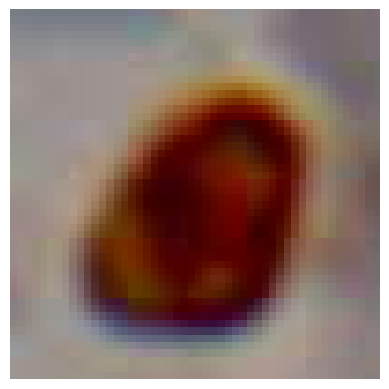

In [11]:
t, x, y, w = (0, 992, 145, 50)
training_image = dt.LoadImage("CellsDataset/original/1.jpg")() / 256
crop = training_image[y:y+w, x:x+w]
plt.imshow(crop)
plt.axis("off")

In [12]:
model = dt.models.LodeSTAR(input_shape=(None, None, 3))
train_set =   (
    dt.Value(crop)
    >> dt.Add(lambda: np.random.randn() * 0.1)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.2))
    >> dt.Multiply(lambda: np.random.uniform(0.6, 1.2))
    >> dt.Affine(scale=lambda:np.random.uniform(0.7, 1.4, 2), translate=lambda:np.random.uniform(-2, 2, 2))
)
# model.model.consistency_weight = X
model.fit(
    train_set,
    epochs=args['num_epochs'],
    batch_size=args['batch_size'],
)

c:\Users\gumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeptrack\features.py:640: UserWarning: Setting dt.Value value as a Image object is likely to lead to performance deterioation. Consider converting it to a numpy array using np.array
  warnings.warn(


1/1 [==============================] - 3s 3s/step
1 cells detected on image 1.jpg


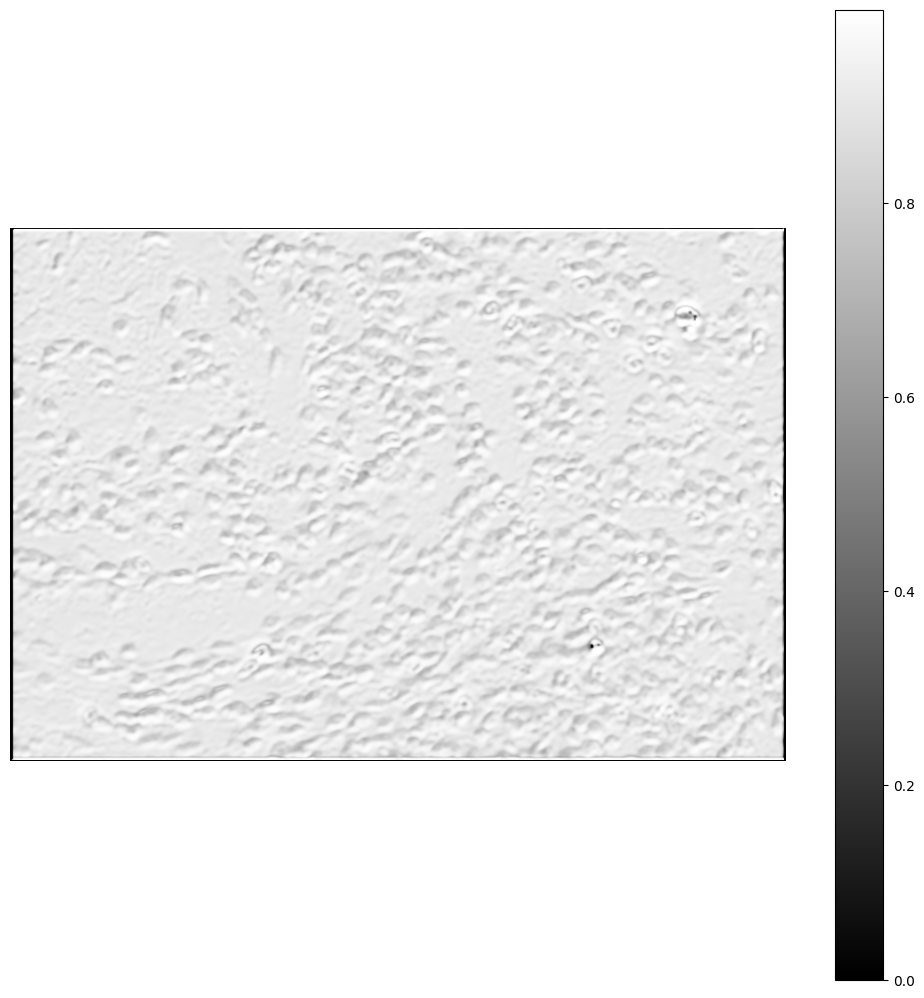

: 

: 

In [ ]:
make_predictions(model, alpha = 0.5, cutoff = 0.996)

In [ ]:
CHECKPOINT_PATH = f'checkpoints/{datetime.datetime.now()}{args["num_epochs"]}_epochs.h5'
# model2 = load_model(CHECKPOINT_PATH)

In [ ]:
# make_predictions(model2, alpha = 0.5, cutoff = 0.9993)